In [1]:
!pip install opencv-python matplotlib pandas seaborn tqdm


Defaulting to user installation because normal site-packages is not writeable


 STEP 2: Imports and Path Setup (with your local paths)

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm

# Your local paths (Windows-style, escape backslashes)
set1_img_dir = r"C:\Users\tapas\ds assigment\Dectection\license_plates_detection_train"
set1_labels_path = r"C:\Users\tapas\ds assigment\Dectection\Licplatesdetection_train.csv"

set2_img_dir = r"C:\Users\tapas\ds assigment\Recogniton\license_plates_recognition_train"
set2_labels_path = r"C:\Users\tapas\ds assigment\Recogniton\license_plates_recognition_train.csv"

test_img_dir = r"C:\Users\tapas\ds assigment\test"
sample_submission_path = r"C:\Users\tapas\ds assigment\SampleSubmission.csv"


 STEP 3: Load and Visualize Bounding Boxes (Training Set 1)

In [4]:
print(df1)

      img_id  ymin  xmin  ymax  xmax
0      1.jpg   276    94   326   169
1     10.jpg   311   395   344   444
2    100.jpg   406   263   450   434
3    101.jpg   283   363   315   494
4    102.jpg   139    42   280   222
..       ...   ...   ...   ...   ...
895   95.jpg   426    34   508   140
896   96.jpg   356   378   457   548
897   97.jpg   229   149   283   217
898   98.jpg   272   252   300   383
899   99.jpg    53   503   217   569

[900 rows x 5 columns]


In [3]:
# Load detection annotations
df1 = pd.read_csv(set1_labels_path)
print("Detection Dataset Sample:")
print(df1.head())

# Visualize a sample image with bounding box
def show_bbox_image(img_name, df):
    img_path = os.path.join(set1_img_dir, img_name)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    row = df[df['image_name'] == img_name].iloc[0]
    ymin, xmin, ymax, xmax = int(row['ymin']), int(row['xmin']), int(row['ymax']), int(row['xmax'])
    
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    plt.title(f"BBox: {img_name}")
    plt.axis('off')
    plt.show()

# Try on one sample
sample_img = df1['image_name'].iloc[0]
show_bbox_image(sample_img, df1)


Detection Dataset Sample:
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222


KeyError: 'image_name'

In [5]:
# Load detection annotations
df1 = pd.read_csv(set1_labels_path)
print("Detection Dataset Sample:")
print(df1.head())

# Visualize a sample image with bounding box
def show_bbox_image(img_name, df):
    img_path = os.path.join(set1_img_dir, img_name)
    if not os.path.exists(img_path):
        print(f"[ERROR] Image not found: {img_path}")
        return
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    row = df[df['image_name'] == img_name].iloc[0]
    ymin, xmin, ymax, xmax = int(row['ymin']), int(row['xmin']), int(row['ymax']), int(row['xmax'])
    
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    plt.title(f"BBox: {img_name}")
    plt.axis('off')
    plt.show()

# Try on one sample
sample_img = df1['image_name'].iloc[0]
show_bbox_image(sample_img, df1)


Detection Dataset Sample:
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222


KeyError: 'image_name'

In [6]:
print(df1.columns)


Index(['img_id', 'ymin', 'xmin', 'ymax', 'xmax'], dtype='object')


In [8]:
# Load detection annotations
df1 = pd.read_csv(r"C:\Users\tapas\ds assigment\Dectection\Licplatesdetection_train.csv")
print("Detection Dataset Sample:")
print(df1.head())

# Visualize a sample image with bounding box
def show_bbox_image(img_name, df):
    img_path = os.path.join(r"C:\Users\tapas\ds assigment\Dectection\license_plates_detection_train", img_name)
    
    if not os.path.exists(img_path):
        print(f"[ERROR] Image not found: {img_path}")
        return
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    row = df[df['image_id'] == img_name].iloc[0]
    ymin, xmin, ymax, xmax = int(row['ymin']), int(row['xmin']), int(row['ymax']), int(row['xmax'])
    
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    plt.title(f"BBox: {img_name}")
    plt.axis('off')
    plt.show()

# Try on one sample
sample_img = df1['image_id'].iloc[0]
show_bbox_image(sample_img, df1)


Detection Dataset Sample:
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222


KeyError: 'image_id'

In [9]:
print(df1.columns.tolist())


['img_id', 'ymin', 'xmin', 'ymax', 'xmax']


In [10]:
df1.rename(columns={df1.columns[0]: 'image_id'}, inplace=True)


  image_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222


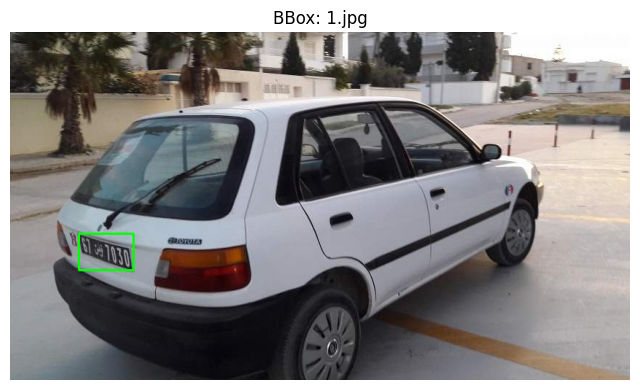

In [11]:
# Load detection CSV
df1 = pd.read_csv(r"C:\Users\tapas\ds assigment\Dectection\Licplatesdetection_train.csv")

# Fix weird hidden characters in column names
df1.rename(columns={df1.columns[0]: 'image_id'}, inplace=True)

print(df1.head())  # Should now show 'image_id' as the column

# Visualize a sample image with bounding box
def show_bbox_image(img_name, df):
    img_path = os.path.join(r"C:\Users\tapas\ds assigment\Dectection\license_plates_detection_train", img_name)
    
    if not os.path.exists(img_path):
        print(f"[ERROR] Image not found: {img_path}")
        return
    
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    row = df[df['image_id'] == img_name].iloc[0]
    ymin, xmin, ymax, xmax = int(row['ymin']), int(row['xmin']), int(row['ymax']), int(row['xmax'])
    
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    plt.title(f"BBox: {img_name}")
    plt.axis('off')
    plt.show()

# Try a sample
sample_img = df1['image_id'].iloc[0]
show_bbox_image(sample_img, df1)


In [13]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Correct paths from you
set2_img_dir = r"C:\Users\tapas\ds assigment\Recogniton\license_plates_recognition_train"
set2_csv_path = r"C:\Users\tapas\ds assigment\Recogniton\Licplatesrecognition_train.csv"

# Load the recognition CSV
df2 = pd.read_csv(set2_csv_path)
df2.rename(columns={df2.columns[0]: 'image_id', df2.columns[1]: 'label'}, inplace=True)

# Check sample data
print("Recognition CSV Sample:")
print(df2.head())


Recognition CSV Sample:
  image_id     label
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979


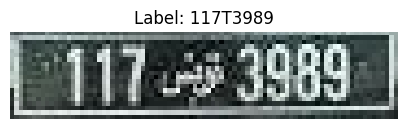

In [14]:
def show_plate_with_label(img_name, label_df):
    img_path = os.path.join(set2_img_dir, img_name)
    
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        return

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    label = label_df[label_df['image_id'] == img_name]['label'].values[0]

    plt.figure(figsize=(5, 3))
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Show a sample plate
sample_img = df2['image_id'].iloc[0]
show_plate_with_label(sample_img, df2)


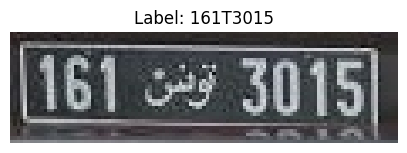

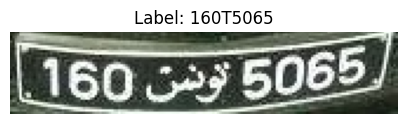

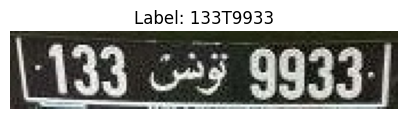

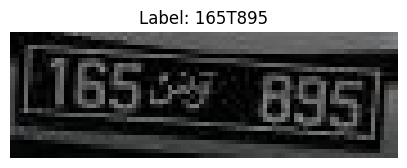

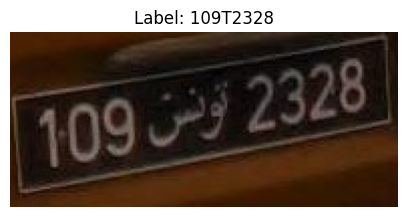

In [15]:
for img_name in df2['image_id'].sample(5, random_state=42):
    show_plate_with_label(img_name, df2)


In [16]:
# Already done earlier
df2 = pd.read_csv(r"C:\Users\tapas\ds assigment\Recogniton\Licplatesrecognition_train.csv")
df2.rename(columns={df2.columns[0]: 'image_id', df2.columns[1]: 'label'}, inplace=True)


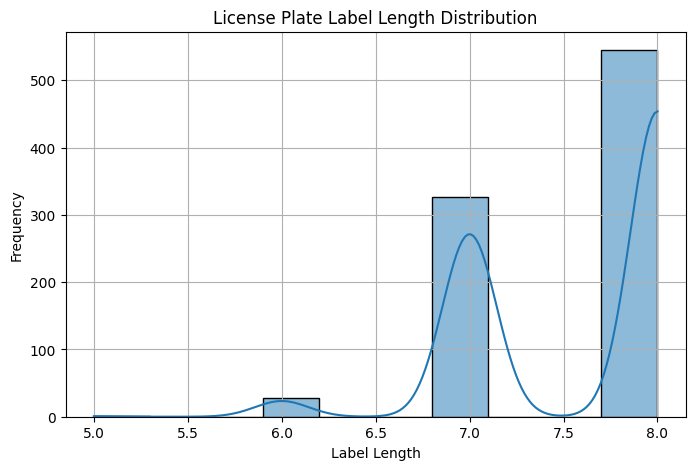

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df2['label_length'] = df2['label'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df2['label_length'], bins=10, kde=True)
plt.title("License Plate Label Length Distribution")
plt.xlabel("Label Length")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [18]:
df2.sample(10, random_state=7)


,image_id,label,label_length
256,330.jpg,194T3593,8
538,591.jpg,93T4591,7
259,333.jpg,94T8974,7
485,541.jpg,110T533,7
453,511.jpg,95T7304,7
841,865.jpg,128T9146,8
862,884.jpg,153T3718,8
891,910.jpg,106T2131,8
60,153.jpg,87T9170,7
63,156.jpg,168T1951,8
